# NBA Machine Learning Model

The NBA's Most Valuable Player award goes to player that contributes the most to their team's success, as well as their own personal statistics, over the course of the regular season. 100 voters are selected by the organization and decide on which of the most successful players receiev this award. While the MVP is supposed to go to the best player in the leage, there is often discourse surrounding the voting criteria, and whether or not a player's name or aspects like popularity contribute to the outcome of MVP voting. In our project, we aim to separate the player's performance from their name and use an anonymous player's statistics to predict if they are worthy of the Most Valuable Player award. We create different machine learning models constisting of a nearest neighbor, a support vector machine, and a decision tree model to establish a strong method of classification for the Most Valuable Player award. We pull our data from a reputable source, basketball-reference.com, and look at the most relevant data from 2018 to 2023, excluding the 2021 season due to COVID. In this project, we will analyze the most relevant factors when considering the MVP award winner and create multiple machine learning models capable of this classification task.

### Import Libraries

In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Performing EDA

The following code blocks will be used to perform EDA on our dataset. This includes handling datatypes, null values, duplicate rows, and other problems that our uncleaned data may have.

### Web Scrape data into Pandas Dataframes

Step 1 is to get our data from some source. For this probject, our data will come from web sraping www.basketball-reference.com for player stats for each year of the NBA.

In [3]:
# Get Last 5 Years of Overall Player Data (Excluding 2020 due to pandemic)
url2023 = "https://www.basketball-reference.com/leagues/NBA_2023_totals.html"
url2022 = "https://www.basketball-reference.com/leagues/NBA_2022_totals.html"
url2021 = "https://www.basketball-reference.com/leagues/NBA_2021_totals.html"
url2019 = "https://www.basketball-reference.com/leagues/NBA_2019_totals.html"
url2018 = "https://www.basketball-reference.com/leagues/NBA_2018_totals.html"

# Store each year's worth of data as it's own dataframe
playerData2023 = pd.DataFrame(pd.read_html(url2023, header = 0)[0])
playerData2022 = pd.DataFrame(pd.read_html(url2022, header = 0)[0])
playerData2021 = pd.DataFrame(pd.read_html(url2021, header = 0)[0])
playerData2019 = pd.DataFrame(pd.read_html(url2019, header = 0)[0])
playerData2018 = pd.DataFrame(pd.read_html(url2018, header = 0)[0])

playerData2023.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,.750,85,286,371,97,45,48,60,143,696


### Clean the Data

Right off the bat, we can easily start working with our data by properly setting datatypes, removing repeated instances of the header, and removing null values. The following code blocks handle these issues.

In [4]:
# Remove the rows of the table which are just repeats of the header for each dataframe
def removeHeaderRepeats(dataframe):
    return dataframe.drop(dataframe.loc[dataframe['Player'] == 'Player'].index)

# Remove header rows for all data
playerData2023 = removeHeaderRepeats(playerData2023)
playerData2022 = removeHeaderRepeats(playerData2022)
playerData2021 = removeHeaderRepeats(playerData2021)
playerData2019 = removeHeaderRepeats(playerData2019)
playerData2018 = removeHeaderRepeats(playerData2018)

In [5]:
# Appropriately set datatypes for each dataframe and rename series for convenience
def setDataTypes(dataframe):
    dataframe['Age'] = dataframe['Age'].astype('Int32')
    dataframe['G'] = dataframe['G'].astype('Int32')
    dataframe['GS'] = dataframe['GS'].astype('Int32')
    dataframe['MP'] = dataframe['MP'].astype('Int32')
    dataframe['FG'] = dataframe['FG'].astype('Int32')
    dataframe['FGA'] = dataframe['FGA'].astype('Int32')
    dataframe['FG%'] = dataframe['FG%'].astype('double')
    dataframe['3P'] = dataframe['3P'].astype('Int32')
    dataframe['3PA'] = dataframe['3PA'].astype('Int32')
    dataframe['3P%'] = dataframe['3P%'].astype('double')
    dataframe['2P'] = dataframe['2P'].astype('Int32')
    dataframe['2PA'] = dataframe['2PA'].astype('Int32')
    dataframe['2P%'] = dataframe['2P%'].astype('double')
    dataframe['eFG%'] = dataframe['eFG%'].astype('double')
    dataframe['FT'] = dataframe['FT'].astype('Int32')
    dataframe['FTA'] = dataframe['FTA'].astype('Int32')
    dataframe['FT%'] = dataframe['FT%'].astype('double')
    dataframe['FG'] = dataframe['FG'].astype('Int32')
    dataframe['FGA'] = dataframe['FGA'].astype('Int32')
    dataframe['FG%'] = dataframe['FG%'].astype('double')
    dataframe['ORB'] = dataframe['ORB'].astype('Int32')
    dataframe['DRB'] = dataframe['DRB'].astype('Int32')
    dataframe['TRB'] = dataframe['TRB'].astype('Int32')
    dataframe['AST'] = dataframe['AST'].astype('Int32')
    dataframe['STL'] = dataframe['STL'].astype('Int32')
    dataframe['BLK'] = dataframe['BLK'].astype('Int32')
    dataframe['TOV'] = dataframe['TOV'].astype('Int32')
    dataframe['PF'] = dataframe['PF'].astype('Int32')
    dataframe['PTS'] = dataframe['PTS'].astype('Int32')

    return dataframe

# Set data types for all data, drop the rank row when reassigning variable, as it is not needed
playerData2023 = setDataTypes(playerData2023).drop(["Rk"], axis=1)
playerData2022 = setDataTypes(playerData2022).drop(["Rk"], axis=1)
playerData2021 = setDataTypes(playerData2021).drop(["Rk"], axis=1)
playerData2019 = setDataTypes(playerData2019).drop(["Rk"], axis=1)
playerData2018 = setDataTypes(playerData2018).drop(["Rk"], axis=1)
    

In [6]:
# Replace all null values with zero. This is because null values only occur when a percentage can't be calculated because there are no attempts
def replaceNullWithZero(dataframe):

    for col in dataframe.columns:
        dataframe[col] = dataframe[col].fillna(0)

    return dataframe

# Replace nulls with zero for all data
playerData2023 = replaceNullWithZero(playerData2023)
playerData2022 = replaceNullWithZero(playerData2022)
playerData2021 = replaceNullWithZero(playerData2021)
playerData2019 = replaceNullWithZero(playerData2019)
playerData2018 = replaceNullWithZero(playerData2018)

After handling datatypes and null values, we now have to handle duplicate rows. In our dataset, if a player changes team mid season, another entry for that exact player is entered into the table with the new team. However, we do not want to treat the same player on two different teams as two different players, so we need to combine each player's stat line on each team into one stat line. The following sections of code will handle this process.

In [7]:
#  Method to get rid of players who have played on multiple teams and keep their row with total
def removeDuplicates(dataframe):
    player_names = set(dataframe['Player'].tolist())
    for name in player_names:

        # Get all rows for current player
        player_data = dataframe.loc[dataframe['Player'] == name]

        # If multiple rows exist, only keep the total row
        if (player_data.shape[0] > 1):

            # only keep the row with total/combined data
            player = player_data.loc[player_data['Tm'] == 'TOT']
            dataframe = dataframe[dataframe['Player'] != name]
            dataframe = pd.concat([dataframe, player], ignore_index=True)

    # Return the dataframe
    return dataframe



In [8]:
playerData2023 = removeDuplicates(playerData2023)
playerData2022 = removeDuplicates(playerData2022)
playerData2021 = removeDuplicates(playerData2021)
playerData2019 = removeDuplicates(playerData2019)
playerData2018 = removeDuplicates(playerData2018)

### Replacing the player names with an ID so that data can be analyzed anonamously

One of the main biases we want to remove in this project is name-bias so that we do not over evaluate or under evaluate a player's performance based on their name and whatever reputation they might have. Therefore, we want to replace the names of each player with a unique ID number so that in our analysis, we do not draw any biased conclusions as to which players are good or not.

In [9]:
# Create a dictionary of player ID's as the key, and the value being the name of the player
def mapNameToID(dataframe):

    # Save all names as a list, create an initial dictionary
    names = list(dataframe['Player'])
    dictionary = {}
    
    # Assign a random unique id to each player
    for name in names:
        id = createID(dictionary)
        dictionary[name] = id

    # Return the dictionary
    return dictionary


# Create a unique random ID between 10000 and 20000
def createID(dictionary):
    
    # Generate random integer
    id = random.randint(10000, 20000)

    # If already in dictionary, generate again
    while (id in dictionary.keys()):
        id = random.randint(10000, 20000)

    # Return the id if unique
    return id


# Replace each name in the dataframe with the id number
def replaceNamesWithID(dataframe, dictionary):
    indices = dataframe.index

    # Go through each row and replace the player name with the id
    for index in indices:
        name = dataframe['Player'].loc[index]
        dataframe.at[index, 'Player'] = dictionary[name]

    return dataframe


# Store Mappings of players to ID for later
ids_2023 = mapNameToID(playerData2023)
ids_2022 = mapNameToID(playerData2022)
ids_2021 = mapNameToID(playerData2021)
ids_2019 = mapNameToID(playerData2019)
ids_2018 = mapNameToID(playerData2018)


# Replace names with IDs in all data
playerData2023 = replaceNamesWithID(playerData2023, ids_2023)
playerData2022 = replaceNamesWithID(playerData2022, ids_2022)
playerData2021 = replaceNamesWithID(playerData2021, ids_2021)
playerData2019 = replaceNamesWithID(playerData2019, ids_2019)
playerData2018 = replaceNamesWithID(playerData2018, ids_2018)

### Summarizing Data

After performing our initial data cleaning, we can summarize our data to show general characteristics about one of our dataframes (a year of stats) which should inherently be similar to that of other years.

In [10]:
# Show summary statistics about the data
playerData2023.describe()
  

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,539.0,539.0,539.0,539.0,539.0,539.0,539.000000,539.0,539.0,539.000000,...,539.000000,539.0,539.0,539.0,539.0,539.0,539.0,539.0,539.0,539.0
mean,25.727273,48.040816,22.820037,1103.593692,191.576994,403.003711,0.463258,56.324675,156.150278,0.315306,...,0.719918,47.623377,150.628942,198.252319,115.545455,33.270872,21.239332,61.298701,91.185529,523.426716
std,4.290326,24.650686,27.295285,827.778918,178.351286,369.600543,0.109669,60.916821,160.957017,0.137108,...,0.212791,52.119796,137.337655,181.82185,129.579185,28.337729,26.526487,58.279083,66.209893,498.085345
min,19.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,23.0,30.5,1.0,329.0,45.5,93.5,0.416500,5.0,17.0,0.281000,...,0.667000,10.0,36.5,50.5,22.0,8.5,5.0,14.5,32.0,120.5
50%,25.0,54.0,8.0,970.0,138.0,300.0,0.455000,36.0,109.0,0.342000,...,0.763000,33.0,118.0,159.0,69.0,28.0,13.0,44.0,86.0,374.0
75%,28.5,68.0,46.5,1846.0,283.5,598.5,0.506000,92.0,249.5,0.385000,...,0.840000,63.0,229.5,286.0,162.5,51.0,28.0,92.5,140.0,769.5
max,42.0,83.0,83.0,2963.0,728.0,1559.0,1.000000,301.0,731.0,1.000000,...,1.000000,274.0,744.0,973.0,741.0,128.0,193.0,300.0,279.0,2225.0


## Data Visualization

In order to determine initial trends in our dataset, we can visualizse our information and calculate other advances metrics for our player stats to see if we can see any tendencies that might indicate which players are better than others.

To start, we will calculate win share for each player in our data. Win share represents how many "wins" a player is responsible throughout a season, i.e. games that a team won because that player was on the team. This advanced metric can help reduce some of our variables down to one variable so that we can compare players easier. The following code blocks will be used to calculate win share for each player.

In [11]:
# For calculating the WS for each player
def calculate_ws(dataframe):
    dataframe['WS'] = (dataframe['PTS'] + dataframe['TRB'] + dataframe['AST'] + dataframe['STL'] + dataframe['BLK'] - dataframe['TOV']) * dataframe['FG%']
    return dataframe

In [12]:
# Calculating the winshares for each player
playerData2023 = calculate_ws(playerData2023)
playerData2022 = calculate_ws(playerData2022)
playerData2021 = calculate_ws(playerData2021)
playerData2019 = calculate_ws(playerData2019)
playerData2018 = calculate_ws(playerData2018)

In addition to using win-share, we can create average stats of some of the important counting stats that we have in our data. (For reference, a counting stat is a stat that is a total, such as total points over the year, while an average stat is one that takes into account the amount of games played, i.e points per game).

In [13]:
# Creates new series to represent average stats for points, assists, and rebounds
def addAverageStats(dataframe):

    # Calculate per game stats and efficiency
    dataframe['PPG'] = dataframe['PTS'] / dataframe['G']
    dataframe['APG'] = dataframe['AST'] / dataframe['G']
    dataframe['RPG'] = dataframe['TRB'] / dataframe['G']

    return dataframe

In [14]:
# Apply mutation to all datasets
playerData2023 = addAverageStats(playerData2023)
playerData2022 = addAverageStats(playerData2022)
playerData2021 = addAverageStats(playerData2021)
playerData2019 = addAverageStats(playerData2019)
playerData2018 = addAverageStats(playerData2018)

We can then create a function to view the top performers in these categories to see if we can discern any trends among each statistic.

In [15]:
# Creates a bar chart visualization for the best players each main statistic
def visualizeStatsBestPlayers(dataframe):

    # Filter players with significant contributions and games played
    top_candidates = dataframe[dataframe['G'] > dataframe['G'].quantile(0.5)].nlargest(20, ['PPG', 'APG', 'eFG%'], keep='all')

    # Visualizations for key metrics
    metrics = ['PPG', 'APG', 'RPG', 'eFG%', 'G']
    
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Player', y=metric, data=top_candidates.sort_values(metric, ascending=False))
        plt.xticks(rotation=45)
        plt.title(f'Top Players - {metric}')
        plt.xlabel('Player')
        plt.ylabel(metric)
        plt.show()




### Visualization of the best players in each statistic for the given year 2023

We will now use the functions created above to create visualizations for our 2023 dataset. Please note the definitions below:

- **PPG:** Points per game
- **APG:** Assists per game
- **RPG:** Rebounds per game
- **eFG%:** Effective field goal percentage (a statistic that adjusts for the fact that three-point field goals are worth more than two-point field goals)
- **G:** Games played

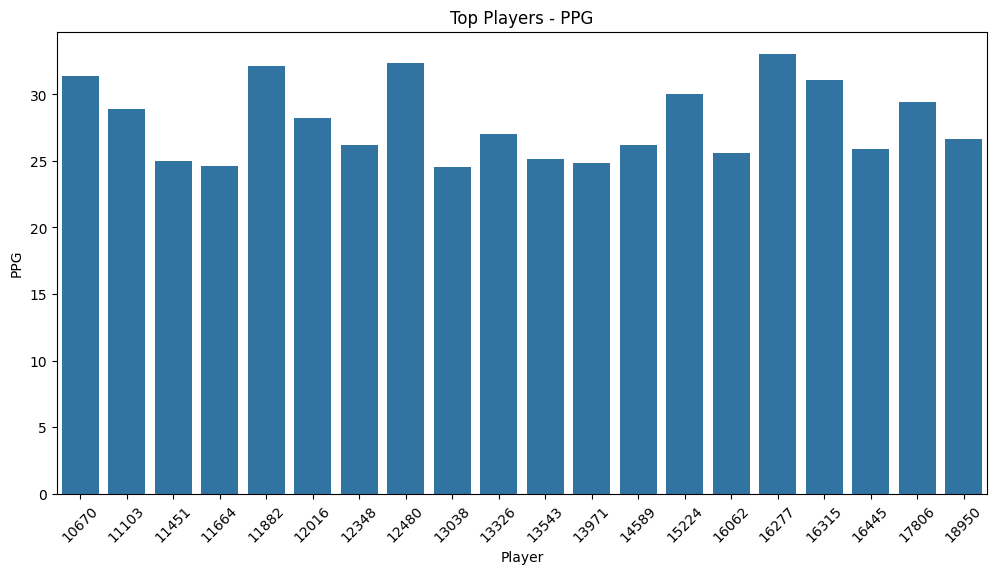

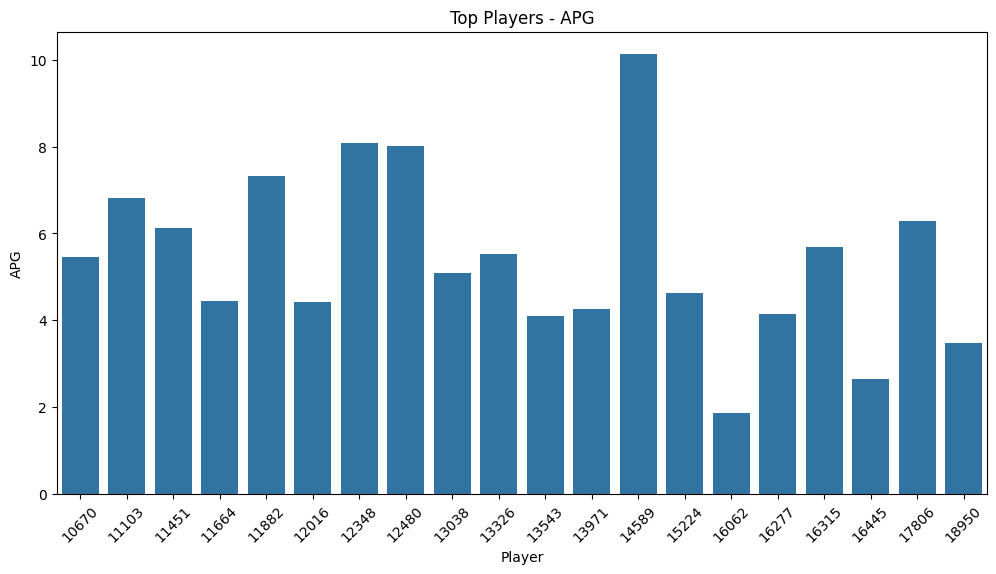

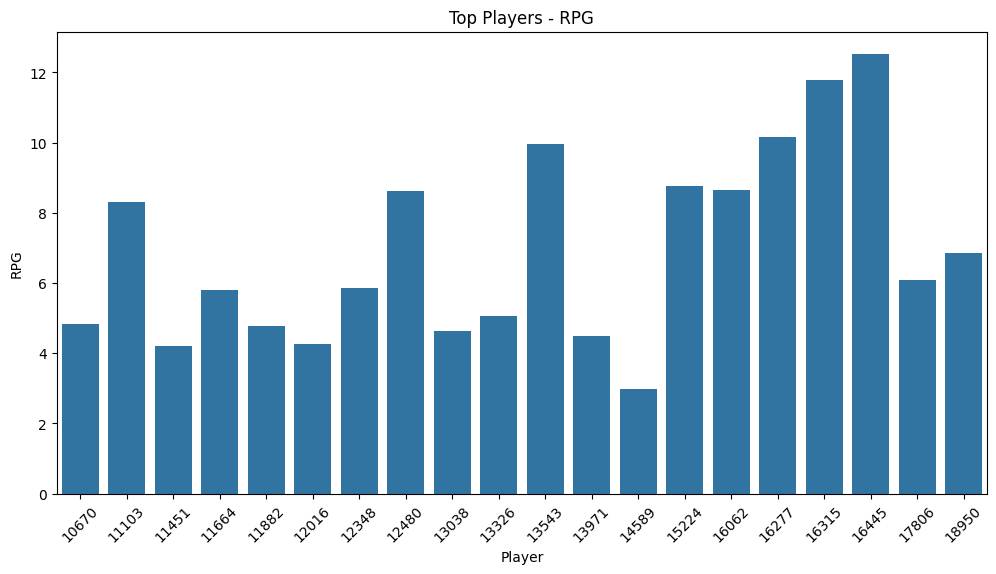

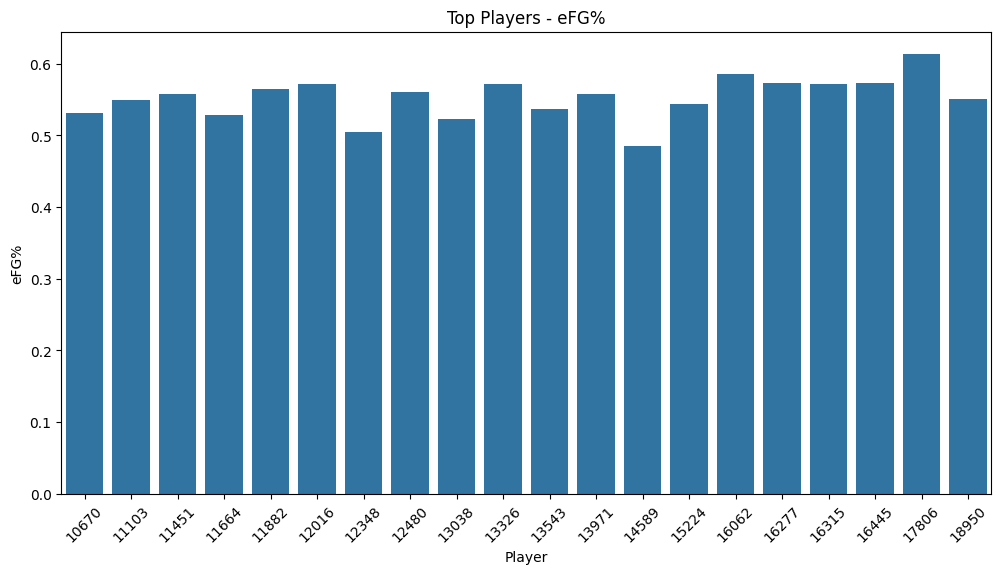

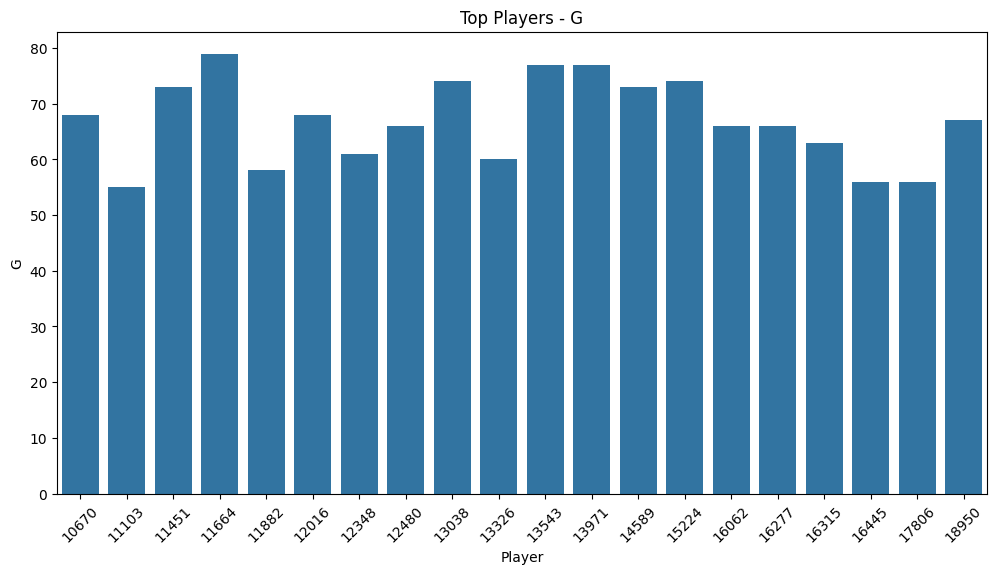

In [16]:
visualizeStatsBestPlayers(playerData2023)


Through these visualizations, we are able to view the stats for players who rank at the top in terms of some of the most important factors that go into MVP discussions. We can see that the top players are all well above 20 points per game and the top 5 players are even above 30 points per game. This is just one example of a statistic that carries significant weight in voting of the regular season MVP. In terms of assists, we can again see that the average top player hovers around 5 assists, with the top 5 averaging more than 7. Rebounds are another statistic that tends to be important, especially with players of  certain positions. Guards in the NBA tend to get less rebounds due to their size, with centers and forwards getting more. The top players in the league tend to get around 10 rebounds if they are a taller player but that number dwindles depending on positions. If we look at a players effective field goal percentage, they are all actually very similar at aroudn 55 percent. The league average effective field goal percentage is also around 55 percent, so this statistic actually has less impact on the MVP voting results. Looking at one of the most important statistics, games played, we can see that this number tends to vary with top players playing almost every game (82 games in a season) and those on the lower end of our top player pool at round 55 games. This is an extremely important statistic to keep track of especially due to new rule changes for the 2024 season and beyond, stating that only players who have played 65 games or more are eligible for regular season awards.

We can further our analysis by calculating a "composite score" for each player, that in theory should give each player an overall grade. This grade should help reduce our rankings down to one number, with the player with a higher score being considered a better player.

In [17]:
# Add a composite score for each player in the dataframe
def calculateCompositeScore(dataframe):

    # Normalizing the stats to make them comparable
    for col in ['PPG', 'APG', 'RPG', 'eFG%', 'WS']:
        dataframe[col] = (dataframe[col] - dataframe[col].min()) / (dataframe[col].max() - dataframe[col].min())
    
    # Calculate the composite score using regulated scales for each statistic
    dataframe['Composite Score'] = (dataframe['PPG'] * 0.2 + dataframe['APG'] * 0.15 + dataframe['RPG'] * 0.15 +
                                    dataframe['eFG%'] * 0.2 + dataframe['WS'] * 0.3)

    return dataframe

In [18]:
# Apply mutation to all datasets
playerData2023 = calculateCompositeScore(playerData2023)
playerData2022 = calculateCompositeScore(playerData2022)
playerData2021 = calculateCompositeScore(playerData2021)
playerData2019 = calculateCompositeScore(playerData2019)
playerData2018 = calculateCompositeScore(playerData2018)

Finally, we can create a function to view the players with the top composite scores and see if we can discern any trends among the distribution

In [19]:
# For visualizing the MVP candidates for the year
def visualizePlayerRanking(dataframe):
    
    # Filter top candidates based on composite score
    top_candidates = dataframe.nlargest(10, 'Composite Score')

    # Visualize the top candidates
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Player', y='Composite Score', data=top_candidates)
    plt.xticks(rotation=45)
    plt.title('Top Candidates')
    plt.xlabel('Player')
    plt.ylabel('Composite Score')
    plt.show()

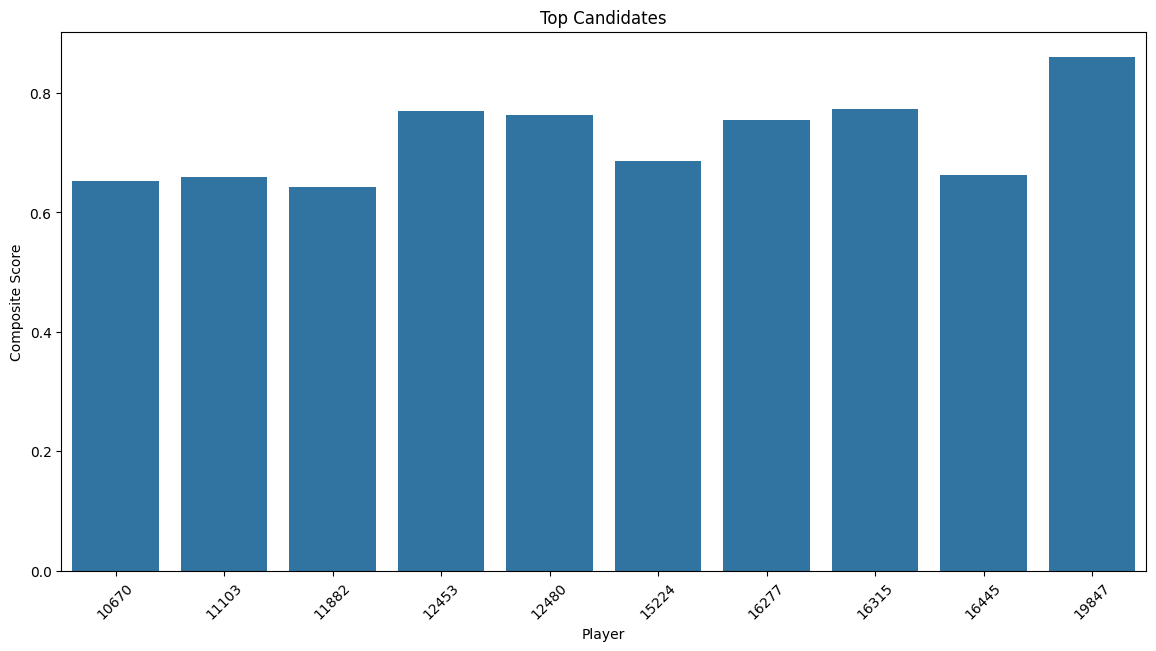

In [20]:
visualizePlayerRanking(playerData2023)

As we can see, player ID 16201 is rated highest as an MVP candidate. Despite being one of the lowest amongst the PPG statistics, the player makes up for it by exceeding in assists and rebounds per game, which is essential to becoming a valuable player in a team. These factors are essential as a valuable team player because it allows your team to have possession of the ball and gives opportunities for your teammates to score. Not to mention, player ID 16201 has the highest eFG%, which means they are extremely efficient at making shots and rarely loses the ball during possession.

When we look at the visualization of the candidates with the top composite score, therefor top MVP candidates, we can see the aggregate scores hover around 0.7 with the highest closer to 0.9. The composite score is made up of different weights being attributed to different statistics. We gave ponits per game 20 percent, assists per game 15 percent, rebounds per game 15 percent, effective field goal percentage 20 percent, and games played 30 percent. When we look at the aggregate score, we can actually see the player with the highest composite score, Nikola Jokic, actually did not win the MVP but rather the player with the fourth highest composite score, Joel Embiid. This is one of the main reasons we're investigating the relation between statistics and the winner of the MVP, to see if statistics and performace alone can predict the winner of the MVP. Something worth mentioning is that in 2023, there was a lot of controversy as to whether or not Joel Embiid actually deserved the MVP award over Nikola Jokic. Nikola Jokic has long been labeled as the best player in the NBA, so when the result of the award was released, it surprised many.

Though in 2023, the composite score may not have predicted who the league MVP would be, we can see that there is still an extremely strong correlation between composite score, player success, and achieving MVP status. In later phases of the project, we'll explore different machine learning models to see which type will best predict MVP winners using our insights from before including knowledge of which statistics might carry the most weight as well as general statistic trends.

# Creating Models to Predict the MVP

### Generating a Suitable Test Dataset

Our next step is to create three models to predict if a player should be an MVP in a given dataset. In order to do this, we need to generate a test data set that contains examples of players that were deemed to be MVPs, and players that were not MVPs. However, our current dataset does not differentiate whether or not a player won MVP that year. Therefore, we are going to go back and import a new dataset that shows all historical MVP candidates in NBA history. Excluding the years for MVP which we already derived data for (i.e. 2022 because our current dataset has all 2022 players in it), we will extract the last 20 MVP winners and use their statline as examples of an MVP. We will then grab random samples of players from our original dataset and fill out the rest of the training data with players that did not win the MVP (again remembering to exclude the MVP winners from our original dataset) to create a final dataset that contains both MVP winners and non-MVP winners

In [21]:
# Web scrape MVP data
mvp_winners_url = "https://www.basketball-reference.com/awards/mvp.html"

# Store as a dataframe
mvp_winners = pd.DataFrame(pd.read_html(mvp_winners_url, header = 0)[0])

By performing simple EDA, we can see that the only main problem is that the header is incorrect and the first row should actually be the header of the dataframe. Therefore,
we will set the header to the first row and remove the first row from the dataframe. Additionally, we can drop the Voting, League, Season, and WS/48 series, since these are not reflected in our original data

In [22]:
# Grab first row
new_header = mvp_winners.iloc[0]

# Set new header
mvp_winners.columns = new_header

# Update dataframe
mvp_winners = mvp_winners[1:]

# Drop Voting, WS, and WS/48 columns
mvp_winners = mvp_winners.drop(['Voting', 'Lg', 'Season', 'WS/48'], axis=1)

Next, we need to take 20 MVPs and add them to our training data set, without including years for which we already have data for. Therefore, we should grab the MVPs from years 2017 to 1997, which is from index 5 to index 26

In [23]:
# Create a new variable and store it to contain the training data
training_set = mvp_winners[6:27]

# Add a column to the dataframe to represents the fact that they won MVP and set it to 1
training_set['MVP'] = 1

/var/folders/v0/0fcwssbx5v70b3c7pf8vt1400000gn/T/ipykernel_12331/2351657106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['MVP'] = 1


Finally, we need to randomly grab samples from our existing dataframes to add to our existing training set. Importantly, we are going to have to match our existing dataframes to have
the same columns as the new training set, which involves removing some columns from our original data, and combining columns into average columns as well.

In [24]:
# Function to convert the fields of the dataframe to match the training set
def convertForTraining(dataframe):
    dataframe['MP'] = dataframe['MP'] / dataframe['G']
    dataframe['PTS'] = dataframe['PTS'] / dataframe['G']
    dataframe['TRB'] = dataframe['TRB'] / dataframe['G']
    dataframe['AST'] = dataframe['AST'] / dataframe['G']
    dataframe['STL'] = dataframe['STL'] / dataframe['G']
    dataframe['BLK'] = dataframe['BLK'] / dataframe['G']
    dataframe['MVP'] = 0

    dataframe = dataframe.drop(['Pos', 'FG', 'FGA', '3P', 'GS', '3PA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TOV', 'PF', 'PPG', 'APG', 'RPG', 'Composite Score'], axis=1)

    return dataframe

In [25]:
# Call function on all dataframes
playerData2023 = convertForTraining(playerData2023)
playerData2022 = convertForTraining(playerData2022)
playerData2021 = convertForTraining(playerData2021)
playerData2019 = convertForTraining(playerData2019)
playerData2018 = convertForTraining(playerData2018)

Importantly, we also have to mark the MVPs from our original datasets as MVPs, because right now they are considered to not be MVPs. Therefore, we must change their MVP column to 1.

In [26]:
# Remove the MVPs from the datasets
mvp_2023 = "Joel Embiid"
mvp_2023_id = ids_2023.get(mvp_2023)
playerData2023.loc[playerData2023['Player'] == mvp_2023_id] = 1

mvp_2022 = "Nikola Jokic"
mvp_2022_id = ids_2022.get(mvp_2022)
playerData2022.loc[playerData2022['Player'] == mvp_2022_id] = 1

mvp_2021 = "Nikola Jokic"
mvp_2021_id = ids_2021.get(mvp_2021)
playerData2021.loc[playerData2021['Player'] == mvp_2021_id] = 1

mvp_2019 = "Giannis Antetokounmpo"
mvp_2019_id = ids_2019.get(mvp_2019)
playerData2019.loc[playerData2019['Player'] == mvp_2019_id] = 1

mvp_2018 = "James Harden"
mvp_2018_id = ids_2018.get(mvp_2018)
playerData2018.loc[playerData2018['Player'] == mvp_2018_id] = 1



Finally, we need to add random samples of other players from our original data to create a full test set of examples of MVPs and examples of not MVPs.

In [27]:
# Add random samples per dataset into the training data
def addRandomSample(dataframe, training_set, num_samples):

    rand_samples = []
    for i in range(num_samples):
        index = random.randint(0, dataframe.shape[0]) - 1
        rand_samples.append(dataframe.iloc[index:index+1])

    rand_samples.append(training_set)
    
    return pd.concat(rand_samples)

    

In [28]:
# Add random samples from each year to the training data
training_set = addRandomSample(playerData2023, training_set, 150)
training_set = addRandomSample(playerData2022, training_set, 150)
training_set = addRandomSample(playerData2021, training_set, 150)
training_set = addRandomSample(playerData2019, training_set, 150)
training_set = addRandomSample(playerData2018, training_set, 150)

## Creating A KNN Model

Now that our training set has been made, we can begin to create models to see if we can predict if a player is worthy of being an MVP or not. We will begin by creating a KNN model. The following code blocks will be used to create, fit, and analyze the performance of this model.

We begin by partitioning our data into training and test sets.

In [29]:
# split the data
X = training_set[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]
y = training_set['MVP']

# Partition the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Now we need to determine which features we should actually use in the model. Using the ExtraTreesClassifier, we can do this now.

In [30]:
# Use ExtraTreesClassifier to determines which features are most valuable (Feature Selection)
feature_selector = ExtraTreesClassifier(n_estimators=50)
feature_selector = feature_selector.fit(X_train, y_train)

# Use SelectFromModel to grab most important features
feature_selector_model = SelectFromModel(feature_selector, prefit=True)
feature_selector_model.fit_transform(X)
best_features = feature_selector_model.get_feature_names_out()

print(best_features)


# Change X train and test features to only include the best features found
X_train = X_train[best_features]
X_test = X_test[best_features]

['MP' 'AST' 'STL' 'PTS']


With good features, we now create the KNN model.

In [31]:
# Create model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit to dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Lets test our first rendition.

In [32]:
# test and evaluate the model
y_pred = knn.predict(X_test)

print('the predicited values are {}'.format(y_pred))
print('The accuracy of the model is: {}'.format(knn.score(X_test, y_test)))

the predicited values are [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
The accuracy of the model is: 0.9741935483870968


Right off the bat, we can see that our model is very accurate!. However, we should still attempt to tune the model. We will use a grid search to tune the n_neighbors and algorithm parameters
to see if we can find any improvements.

In [33]:
# List parameters
params = {'n_neighbors': (1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21),
          'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')}

# Create new k nearnest neighbors model
knn = KNeighborsClassifier()

# initialize Grid Search with Cross Validation to tune nearest neighbors value
knn_grid = GridSearchCV(estimator = knn, param_grid = params, cv=5, return_train_score=True)
knn_grid.fit(X_train, y_train)

# Display best paramters
print()
print("The best hyperparamteres were: ")
print(knn_grid.best_params_) #print the best parameters

# Display best score
print()
print("These parameters resulted in the following accuracy score: ")
print(knn_grid.best_score_)  #print the best score



The best hyperparamteres were: 
{'algorithm': 'auto', 'n_neighbors': 1}

These parameters resulted in the following accuracy score: 
0.9870049829530553


Tuning shows that the ideal model uses an 'auto' algorithm and 5 neighbors. Right now our model is very accurate, however this could be because it is overfitting to the data. Therefore, we will use our cross validation results to see if
there is any overfitting in the data.

In [34]:
# View bias-varianace scores to determine if data is overfitting
cv_results = pd.DataFrame(knn_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results.head()
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,1.000000,0.000000,0.987005,0.003999
11,1.000000,0.000000,0.987005,0.003999
33,1.000000,0.000000,0.987005,0.003999
22,1.000000,0.000000,0.987005,0.003999
4,0.983767,0.002865,0.982153,0.003173


Our tuned model shows a very high accuracy in both the training data and the test data, with almost identical standard deviations. This shows that our model is not overfitting and is accurate! As a final test, lets create this model and run a classification report to view its results.

In [35]:
# Create new k nearnest neighbors model with best parameters
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Not MVP', 'MVP']))

              precision    recall  f1-score   support

     Not MVP       0.97      0.99      0.98       147
         MVP       0.67      0.50      0.57         8

    accuracy                           0.96       155
   macro avg       0.82      0.74      0.78       155
weighted avg       0.96      0.96      0.96       155



This classification report shows great precision, recall, and F1 scores for our model! The model does a great job at predicting both the Not MVP and MVP category. Interestingly, it is a little worse at predicting the MVPs, which we can see by observing the difference between the f1-scores. Overall, it appears that our KNN model is accurate and reliable at predicting which player will be an MVP or not.

## Creating a SVM Model

Next, we will use a support vector machine model to see if we can improve upon the performance of our previous models. The following code blocks will be used to create, fit, and analyze the performance of this model.

Because this is a new dataset, lets re-partition our data.

In [36]:
# split the data
X = training_set[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]
y = training_set['MVP']

# Partition the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Next, let's normalize all numeric data in both the training and test sets

In [37]:
# First, we need to copy the training and testing data
X_train = X_train.copy()
X_test  = X_test.copy()

#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']])
scaler.fit(X_test[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']])

X_train[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']] = scaler.transform(X_train[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']])
X_test[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']] = scaler.transform(X_test[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']])


With the training set now prepared, lets create our first rendition and see how it does. For this model, we will choose to not go through with any feature selection to see if we can see any benefits in our model.

In [38]:
# Create the model and fit it to the training data
svm = SVC()
svm.fit(X_train, y_train)

# Predict the test data 
y_pred = svm.predict(X_test)

print('The predicted results are: {}'.format(y_pred))
print()
print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The predicted results are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]

The accuracy of the model is: 0.9525862068965517


This first model shows an accuracy that is slightly lower than our KNN model's tuned accuracy, so we will now go about tuning the model further. To do this, we will again perform a grid search.

In [39]:
# List parameters
params = {'gamma': ('scale', 'auto'),
          'degree': (1, 2, 3, 4, 5),
          'kernel' : ('linear', 'poly', 'sigmoid', 'rbf')}

# Create new k nearnest neighbors model
svm = SVC()

# initialize Grid Search with Cross Validation to tune nearest neighbors value
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score=True)
svm_grid.fit(X_train, y_train)

# Display best paramters
print()
print("The best hyperparamteres were: ")
print(svm_grid.best_params_) #print the best parameters

# Display best score
print()
print("These parameters resulted in the following accuracy score: ")
print(svm_grid.best_score_)  #print the best score


The best hyperparamteres were: 
{'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

These parameters resulted in the following accuracy score: 
0.988871581862236


We can see that our tuned model with the parameters of degree = 1, gamma = scale, and kernel = poly produces a result with higher accuracy. However, we now need to ensure that our model is not overfitting to the training data.

In [40]:
# View bias-varianace scores to determine if data is overfitting
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results.head()
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
37,1.000000,0.000000,0.988872,0.003695
33,1.000000,0.000000,0.988872,0.003695
13,0.993044,0.001461,0.987002,0.009463
29,1.000000,0.000000,0.985151,0.004565
25,1.000000,0.000000,0.985151,0.004565


Our tuned model shows a very high accuracy in both the training data and the test data, with almost identical standard deviations. This shows that our model is not overfitting and is accurate! As a final test, lets create this model and run a classification report to view its results.

In [41]:
# Create new k nearnest neighbors model with best parameters
svc = SVC(degree=4, gamma='scale', kernel='poly')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Not MVP', 'MVP']))

              precision    recall  f1-score   support

     Not MVP       0.98      0.99      0.98       221
         MVP       0.70      0.64      0.67        11

    accuracy                           0.97       232
   macro avg       0.84      0.81      0.83       232
weighted avg       0.97      0.97      0.97       232



Interestingly, our classification results are mostly positive. The model did a great job determining which players are not MVPs. However, it was only decent at determining the MVPs, as the precision, recall, and f1-score for predicting this classification was significantly smaller than that of predicting the non MVPs. Overall, the model still does a good job at classifying the players.

## Creating a Decision Tree model

Now, we will use a decision tree model to see if we can improve upon the performance of our previous models. The following code blocks will be used to create, fit, and analyze the performance of this model.

Again, lets re-partition our data.

In [42]:
# Split the data
X = training_set[['Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]
y = training_set['MVP']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For this decision tree model, we will also choose to not go through with any feature selection. Let's create the model, train it, and evaluate it's accuracy.

In [43]:
# Creating the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Training the model
dt.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# Evaluating the model
print('The accuracy of the model is: {}'.format(dt.score(X_test, y_test)))
print()
print('The predicted results are: {}'.format(y_pred))

The accuracy of the model is: 0.9870967741935484

The predicted results are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0]


We can see that our decision tree model is very accurate!. However, we should still attempt to tune the model so we can compare it to our other tuned models. We will use a grid search to tune the hyperparameters to see if we can find any improvements.

In [44]:
# List parameters
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

# Use GridSearch
dt_grid = GridSearchCV(dt, param_grid, cv=5, return_train_score=True)
dt_grid.fit(X_train, y_train)

# Display best parameters
print()
print("The best hyperparameters were: ")
print(dt_grid.best_params_) #print the best parameters

# Display best score
print()
print("These parameters resulted in the following accuracy score: ")
print(dt_grid.best_score_)  #print the best score


The best hyperparameters were: 
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

These parameters resulted in the following accuracy score: 
0.9902570154733805


Our tuned model has parameters of criterion = 'gini', max_depth = None, min_samples_leaf = 1 and min_samples_split = 2. The parameters produces a result with higher accuracy of 0.99 as compared to the previous 0.98. However, we now need to ensure that our model is not overfitting to the training data.

In [45]:
# View bias-varianace scores to determine if data is overfitting
cv_results = pd.DataFrame(dt_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results.head()
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
20,0.992289,0.002366,0.990257,0.009484
1,0.992289,0.002366,0.990257,0.009484
2,0.992289,0.002366,0.990257,0.009484
38,0.992289,0.002366,0.990257,0.009484
37,0.992289,0.002366,0.990257,0.009484


Our tuned model shows a very high and similar accuracy in the training data and test data, meaning the model is not overfitting. As a final test, lets create this model and run a classification report to view its results.

In [46]:
# Create new decision tree model with best parameters
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not MVP', 'MVP']))

              precision    recall  f1-score   support

     Not MVP       1.00      0.99      0.99       150
         MVP       0.71      1.00      0.83         5

    accuracy                           0.99       155
   macro avg       0.86      0.99      0.91       155
weighted avg       0.99      0.99      0.99       155



The model did a great job determining which players are not MVPs and are MVPS. However, the model is moderately better at determing players that aren't MVP rather than are MVP. The precision and f1-score for predicting MVP was significantly smaller than that of predicting the non MVPs, but the recall score was slightly higher for MVP than not MVP. Overall, the model does a great job at classifying MVP players.

## Impacts

Our models aim to accomplish one main task which is to classify a player as either being worthy of the MVP award or not. This model could even help current MVP voters narrow down their pool of potential candidates down to those who are statistically worthy, followed by a personal selection using possibly their own bias in their final decision. 

The model can also be capable of checking whether or not players in past seasons should have been given more consideration for the award. Often at the end of an NBA season, there is a lot of discourse regarding the player that deserves the award the most, so by using the tool, pure statistics can be used to predict and justify a winner.


## Conclusion

By creating multiple machine learning models including KNN, SVM, and a decision tree model, we were able to develop more of an understanding of how the MVP is chosen and which statistics tend to be the most important. We were able to see that the decision tree model was the most accurate and predicted non-MVP winners with 100 percent precision and MVP winners with 71 percent precision. The recall score is close to 100 percent for both classifications as well. These statistics come in just over those of the SVM model which spits out statistics just over the KNN model.

With such strong precision and recall scores, we are confident in the decision tree model’s capabilities as a predictor and classifier for NBA MVP winners and can show the multiple use cases for the model. With this model, not only can past MVPs be either validated or invalided in their MVP decision but also serve as a reliable predictor for players who might be deserving of the award.

Overall, we achieved what we set out to do in creating a model capable of classifying a given NBA player into MVP worthy or not. We were able to analyze different types of machine learning models and choose the most accurate one, the decision tree model. In the process of developing these models, we were also able to discover which features and statistics were most impactful in MVP voting. We were also able to uncover which MVP winners might have been more controversial while looking at their competitors.

In terms of future adjustments, something to consider is the competition for the award within the NBA. Our model is able to predict those worthy of the award in terms of statistics, if fed a single player. We might want to add functionality to feed the model an entire data set for a season’s data. This way, the model might be able to compare players to each other and decide on the winner of the MVP award in more of a relative fashion. For example, if every player in the NBA underperforms significantly in a season, the model might tell us that no player in that year is deserving of the award, while in reality, the player who performs the best, despite everyone’s statistical drop-off, would be the winner.

